[Table of Contents](table_of_contents.ipynb)

# Topic 12.  Linear Operators
Author: Michael Eyler, <eyler94@gmail.com>
    

##  Introduction

Linear operators are an everyday occurance and thus should be well understood. A linear operator is any operation which allows scalar multiplication or operand addition to be performed inside or outside but reaches the same answer eitherway. Some examples include matrix multiplication, integration, differentation, and linear constant coefficient transfer functions. Some special examples include projection matrices, fourier transforms, and convolution. 

These operators help us to condense, understand, or otherwise reformat information contained in matrices, functions, vectors, and sequences.

Some examples of non-linear operators include rotation matrices, trigonometric functions, logarithmic and exponential functions, as well as most polynomials. 


## Explanation

A great definition of linear operators is found on page 108 of the book, Definition 2.34. A simplified version follows.

For any linear operator, A, scalars, $\alpha$ and $\beta$, and operands, $\textbf{x}$ and $\textbf{y}$.

1. $A[\alpha * \textbf{x}] = \alpha * A[\textbf{x}]$.

2. $A[\alpha * \textbf{x}] + A[\beta * \textbf{y}] = A[\alpha * \textbf{x} + \beta * \textbf{y}]$.

## Simple Numerical Examples

Following are some examples of linear operators acting on matricies and functions. 

The first solution of each example demonstrates that you can move a scalar outside the operand without impacting the result.

The second solution of each example shows that the outcome of combined operands is the same as the combined outputs of the individual operands.

Notice that A[B]*beta is the same as A[B*beta].

A[B]*beta:

 [[15 36]
 [63 96]]

A[B*beta]:

 [[15 36]
 [63 96]]

Notice also that A[B*beta]+A[D*gamma] is the same as A[B*beta+D*gamma].

A[B*beta]+A[D*gamma]:

 [[ 65 146]
 [243 356]]

A[B*beta+D*gamma]:

 [[ 65 146]
 [243 356]]


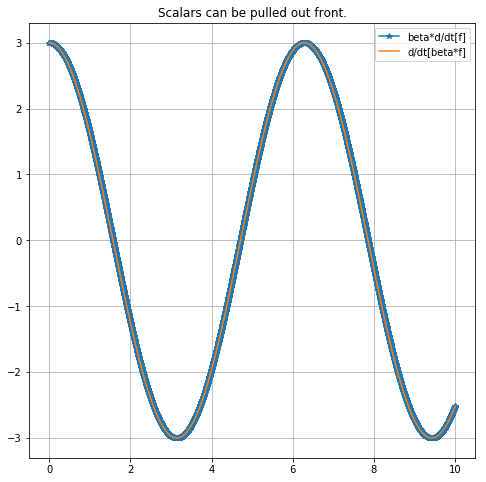

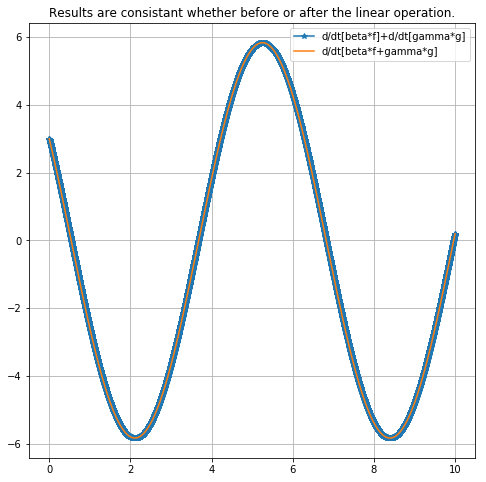

In [6]:
import numpy as np

#Matrix example of linear operators

A = np.array([[1,2],[3,4]]) #Linear operator: A
B = np.array([[5,6],[7,8]]) #Operand: B
beta = 3 #Constant: beta
print("Notice that A[B]*beta is the same as A[B*beta].")
print("\nA[B]*beta:\n\n", A*B*beta)
C = B*beta
print("\nA[B*beta]:\n\n", A*C)
D = np.array([[10,11],[12,13]])
gamma = 5
E = D*gamma #Operand D*gamma
print("\nNotice also that A[B*beta]+A[D*gamma] is the same as A[B*beta+D*gamma].")
print("\nA[B*beta]+A[D*gamma]:\n\n", A*C+A*E)
print("\nA[B*beta+D*gamma]:\n\n", A*(C+E))

###Numerical differentation example
import matplotlib
import matplotlib.pyplot as plt

def deriv(func, ts):
    n = np.size(func)
    d_func = np.zeros(n-1)
    for i in range(0,np.size(d_func)):
        d_func[i] = (func[i+1]-func[i])/ts
    return d_func

ts = 0.001
t = np.arange(0,10,ts)
f = np.sin(t)
g = np.cos(t)

d_f = beta*deriv(f,ts)
d_f_b = deriv(beta*f,ts)

plt.figure(figsize=(8,8))
plt.plot(t[0:-1],d_f,'-*')
plt.plot(t[0:-1],d_f_b)
plt.title("Scalars can be pulled out front.")
plt.legend(['beta*d/dt[f]','d/dt[beta*f]'])
plt.grid()
plt.show()

d_f_g_out = deriv(gamma*g,ts)+deriv(beta*f,ts)
d_f_g_in = deriv((gamma*g+beta*f),ts)

plt.figure(figsize=(8,8))
plt.plot(t[0:-1],d_f_g_out,'-*')
plt.plot(t[0:-1],d_f_g_in)
plt.title("Results are consistant whether before or after the linear operation.")
plt.legend(['d/dt[beta*f]+d/dt[gamma*g]','d/dt[beta*f+gamma*g]'])
plt.grid()
plt.show()


## An Engineering Application

One engineering application includes modeling dynamic systems and their response to applied forces. This is commonly done with transfer functions. Linear Time Invariant systems are in fact linear operators on the force. Transforming a force into a reaction (that reaction could be motion, energy, or some combination.)

The following example is of a mass that has a spring and damper restraining it. It is taken from Dr. Randall Beard and Dr. Tim McClain's book, Introduction to Feedback Control Using Design Studies, and modified slightly to work on this Jupyter project.

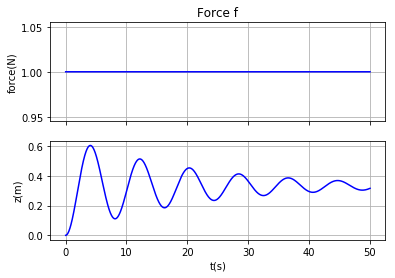

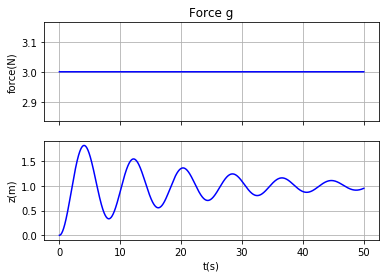

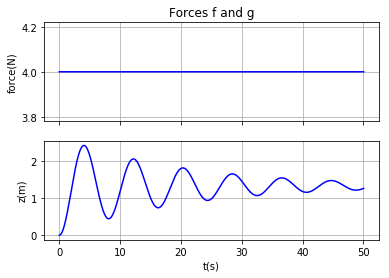

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import random


# Mass Parameters
class P:
    def __init__(self):
        # Physical parameters of the mass known to the controller
        self.m = 5.0  # mass kg
        self.k = 3.0  # spring constant Kg/s^2
        self.b = 0.5  # damping coefficient Kg/s

        # parameters for animation
        self.length = 5.0
        self.width = 1.0

        # Initial Conditions
        self.z0 = 0.0  # initial position of mass, m
        self.zdot0 = 0.0  # initial velocity of mass m/s

        # Simulation Parameters
        self.t_start = 0.0  # Start time of simulation
        self.t_end = 50.0  # End time of simulation
        self.Ts = 0.01  # sample time for simulation
        self.t_plot = 0.1  # the plotting and animation is updated at this rate

        # dirty derivative parameters
        self.sigma = 0.05  # cutoff freq for dirty derivative
        self.beta = (2.0*sigma-Ts)/(2.0*sigma+Ts)  # dirty derivative gain

        # saturation limits
        self.F_max = 2.0  # Max force, N

# Plotting

plt.ion()  # enable interactive drawing


class plotData:
    ''' 
        This class plots the time histories for the mass data.
    '''

    def __init__(self,title):
        # Number of subplots = num_of_rows*num_of_cols
        self.num_rows = 2    # Number of subplot rows
        self.num_cols = 1    # Number of subplot columns

        # Crete figure and axes handles
        self.fig, self.ax = plt.subplots(self.num_rows, self.num_cols, sharex=True)

        # Instantiate lists to hold the time and data histories
        self.time_history = []  # time
        self.z_history = []  # position z
        self.force_history = []  # control force

        # create a handle for every subplot.
        self.handle = []
        self.handle.append(myPlot(self.ax[0], ylabel='force(N)', title=title))
        self.handle.append(myPlot(self.ax[1], xlabel='t(s)', ylabel='z(m)'))#'Mass Data'))

    def updatePlots(self, t, states, ctrl):
        '''
            Add to the time and data histories, and update the plots.
        '''
        # update the time history of all plot variables
        self.time_history.append(t)  # time
        self.z_history.append(states[0])  # mass position
        self.force_history.append(ctrl)  # force on the base

        # update the plots with associated histories
        self.handle[0].updatePlot(self.time_history, [self.force_history])
        self.handle[1].updatePlot(self.time_history, [self.z_history])


class myPlot:
    ''' 
        Create each individual subplot.
    '''
    def __init__(self, ax,
                 xlabel='',
                 ylabel='',
                 title='',
                 legend=None):
        ''' 
            ax - This is a handle to the  axes of the figure
            xlable - Label of the x-axis
            ylable - Label of the y-axis
            title - Plot title
            legend - A tuple of strings that identify the data. 
                     EX: ("data1","data2", ... , "dataN")
        '''
        self.legend = legend
        self.ax = ax                  # Axes handle
        self.colors = ['b', 'g', 'r', 'c', 'm', 'y', 'b']
        # A list of colors. The first color in the list corresponds
        # to the first line object, etc.
        # 'b' - blue, 'g' - green, 'r' - red, 'c' - cyan, 'm' - magenta
        # 'y' - yellow, 'k' - black
        self.line_styles = ['-', '-', '--', '-.', ':']
        # A list of line styles.  The first line style in the list
        # corresponds to the first line object.
        # '-' solid, '--' dashed, '-.' dash_dot, ':' dotted

        self.line = []

        # Configure the axes
        self.ax.set_ylabel(ylabel)
        self.ax.set_xlabel(xlabel)
        self.ax.set_title(title)
        self.ax.grid(True)

        # Keeps track of initialization
        self.init = True   

    def updatePlot(self, time, data):
        ''' 
            Adds data to the plot.  
            time is a list, 
            data is a list of lists, each list corresponding to a line on the plot
        '''
        if self.init == True:  # Initialize the plot the first time routine is called
            for i in range(len(data)):
                # Instantiate line object and add it to the axes
                self.line.append(Line2D(time,
                                        data[i],
                                        color=self.colors[np.mod(i, len(self.colors) - 1)],
                                        ls=self.line_styles[np.mod(i, len(self.line_styles) - 1)],
                                        label=self.legend if self.legend != None else None))
                self.ax.add_line(self.line[i])
            self.init = False
            # add legend if one is specified
            if self.legend != None:
                plt.legend(handles=self.line)
        else: # Add new data to the plot
            # Updates the x and y data of each line.
            for i in range(len(self.line)):
                self.line[i].set_xdata(time)
                self.line[i].set_ydata(data[i])

        # Adjusts the axis to fit all of the data
        self.ax.relim()
        self.ax.autoscale()

# Mass Dynamics

class massDynamics:
    '''
        Model the physical system
    '''

    def __init__(self):
        # Initial state conditions
        self.state = np.matrix([[P.z0],      # initial mass position
                                [P.zdot0]])  # initial mass velocity
        #################################################
        # The parameters for any physical system are never known exactly.  Feedback
        # systems need to be designed to be robust to this uncertainty.  In the simulation
        # we model uncertainty by changing the physical parameters by a uniform random variable
        # that represents alpha*100 % of the parameter, i.e., alpha = 0.2, means that the parameter
        # may change by up to 20%.  A different parameter value is chosen every time the simulation
        # is run.
        alpha = 0  # Uncertainty parameter
        self.m = P.m * (1+2*alpha*np.random.rand()-alpha)  # Mass, kg
        self.k = P.k * (1+2*alpha*np.random.rand()-alpha)  # spring constant, m
        self.b = P.b * (1+2*alpha*np.random.rand()-alpha)  # Damping coefficient, Ns
        self.Ts = P.Ts  # sample rate at which the dynamics are propagated

    def propagateDynamics(self, u):
        '''
            Integrate the differential equations defining dynamics
            P.Ts is the time step between function calls.
            u contains the system input(s).
        '''
        # Integrate ODE using Runge-Kutta RK4 algorithm
        k1 = self.derivatives(self.state, u)
        k2 = self.derivatives(self.state + self.Ts/2*k1, u)
        k3 = self.derivatives(self.state + self.Ts/2*k2, u)
        k4 = self.derivatives(self.state + self.Ts*k3, u)
        self.state += self.Ts/6 * (k1 + 2*k2 + 2*k3 + k4)

    def derivatives(self, state, u):
        '''
            Return xdot = f(x,u), the derivatives of the continuous states, as a matrix
        '''
        # re-label states and inputs for readability
        z = state.item(0)
        zdot = state.item(1)
        force = u
        # The equations of motion.
        zddot = (force - self.b*zdot - self.k*z)/self.m

        # build xdot and return
        xdot = np.matrix([[zdot], [zddot]])
        return xdot

    def outputs(self):
        '''
            Returns the measured outputs as a list
            [z] with added Gaussian noise
        '''
        # re-label states for readability
        z = self.state.item(0)
        # add Gaussian noise to outputs
        z_m = z + random.gauss(0, 0.001)
        # return measured outputs
        return [z_m]

    def states(self):
        '''
            Returns all current states as a list
        '''
        return self.state.T.tolist()[0]

    
# instantiate parameters, mass, controller, and reference classes
P = P()

mass_f = massDynamics()
mass_g = massDynamics()
mass_f_g = massDynamics()

# instantiate the simulation plots and animation
dataPlot_f = plotData("Force f")
dataPlot_g = plotData("Force g")
dataPlot_f_g = plotData("Forces f and g")

t = P.t_start  # time starts at t_start
while t < P.t_end:  # main simulation loop
    # Propagate dynamics in between plot samples
    t_next_plot = t + P.t_plot
    while t < t_next_plot:  # updates control and dynamics at faster simulation rate
        f=1
        g=3
        mass_f.propagateDynamics(f)  # Propagate the dynamics
        mass_g.propagateDynamics(g)  # Propagate the dynamics
        mass_f_g.propagateDynamics(f+g)  # Propagate the dynamics
        t = t + P.Ts  # advance time by Ts
    # update animation and data plots
        dataPlot_f.updatePlots(t, mass_f.states(), f)
        dataPlot_g.updatePlots(t, mass_g.states(), g)
        dataPlot_f_g.updatePlots(t, mass_f_g.states(), f+g)


Notice how the force f (1 N) and the force g (3 N) can be placed on the system separately and their outputs summed are equal to the forced being applied to the system together.

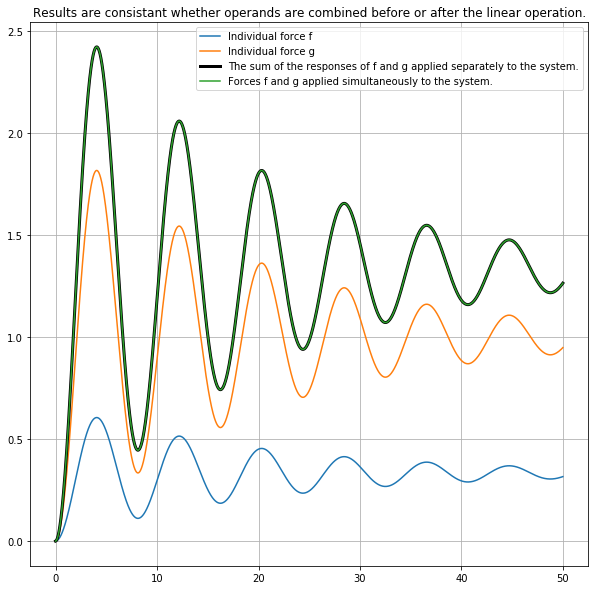

In [12]:
plt.figure(figsize=(10,10))
f_g = np.zeros(5000)
for i in range(5000):
    f_g[i] = dataPlot_f.z_history[i]+dataPlot_g.z_history[i]

plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_f.z_history[:-3])
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_g.z_history[:-3])
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),f_g,'k',linewidth=3)
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_f_g.z_history[:-3])

plt.title("Results are consistant whether operands are combined before or after the linear operation.")
plt.legend(['Individual force f',
            'Individual force g',
            'The sum of the responses of f and g applied separately to the system.',
            'Forces f and g applied simultaneously to the system.'])
plt.grid()
plt.show()
